In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/image_course

/content/drive/MyDrive/image_course


In [ ]:
import gensim
import gensim.downloader as api
import pandas as pd
import re
import numpy as np
from nltk import ngrams
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_str(text):
    search = ["أ","إ","آ","ة","_","-","/",".","،"," و "," يا ",'"',"ـ","'","ى","\\",'\n', '\t','&quot;','?','؟','!']
    replace = ["ا","ا","ا","ه"," "," ","","",""," و"," يا","","","","ي","",' ', ' ',' ',' ',' ',' ']

    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    text = re.sub(p_tashkeel,"", text)

    #remove longation
    p_longation = re.compile(r'(.)\1+')
    subst = r"\1\1"
    text = re.sub(p_longation, subst, text)

    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('اا', 'ا')

    for i in range(0, len(search)):
        text = text.replace(search[i], replace[i])

    #trim
    text = text.strip()

    return text

def remove_non_arabic(text):
    return re.sub(r'[^\u0600-\u06FF\s]', '', text)



def remove_stopwords(text):
    stop_words = set(stopwords.words('arabic'))
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])


def stem_words(text):
    stemmer = ISRIStemmer()
    words = word_tokenize(text)
    return ' '.join([stemmer.stem(word) for word in words])


def get_vec(n_model,dim, token):
    vec = np.zeros(dim)
    is_vec = False
    if token not in n_model.wv:
        _count = 0
        is_vec = True
        for w in token.split("_"):
            if w in n_model.wv:
                _count += 1
                vec += n_model.wv[w]
        if _count > 0:
            vec = vec / _count
    else:
        vec = n_model.wv[token]
    return vec

def calc_vec(pos_tokens, neg_tokens, n_model, dim):
    vec = np.zeros(dim)
    for p in pos_tokens:
        vec += get_vec(n_model,dim,p)
    for n in neg_tokens:
        vec -= get_vec(n_model,dim,n)

    return vec

## -- Retrieve all ngrams for a text in between a specific range
def get_all_ngrams(text, nrange=3):
    text = re.sub(r'[\,\.\;\(\)\[\]\_\+\#\@\!\?\؟\^]', ' ', text)
    tokens = [token for token in text.split(" ") if token.strip() != ""]
    ngs = []
    for n in range(2,nrange+1):
        ngs += [ng for ng in ngrams(tokens, n)]
    return ["_".join(ng) for ng in ngs if len(ng)>0 ]

## -- Retrieve all ngrams for a text in a specific n
def get_ngrams(text, n=2):
    text = re.sub(r'[\,\.\;\(\)\[\]\_\+\#\@\!\?\؟\^]', ' ', text)
    tokens = [token for token in text.split(" ") if token.strip() != ""]
    ngs = [ng for ng in ngrams(tokens, n)]
    return ["_".join(ng) for ng in ngs if len(ng)>0 ]

## -- filter the existed tokens in a specific model
def get_existed_tokens(tokens, n_model):
    return [tok for tok in tokens if tok in n_model.wv ]
def remove_punc(text):
  arabic_punctuations = r'''[،؛؟!.؟]'''
  cleaned_text = re.sub(arabic_punctuations, '', text)
  return cleaned_text

def preprocess_text(text):
    text = clean_str(text)
    text = remove_non_arabic(text)
    #text = remove_stopwords(text)
    text = remove_punc(text)
    #text = stem_words(text)
    #tokenized_text =  model.wv.get_mean_vector(text)
    return text

In [ ]:
#!wget https://bakrianoo.ewr1.vultrobjects.com/aravec/full_grams_cbow_300_twitter.zip
#!unzip full_grams_cbow_300_twitter.zip

In [ ]:
model_path = '/content/drive/MyDrive/image_course/full_grams_cbow_300_twitter.mdl'

In [ ]:
# load the AraVec model
model = gensim.models.Word2Vec.load(model_path)


In [ ]:
type(model)

gensim.models.word2vec.Word2Vec

In [ ]:
type(model.wv['القاهره'])

numpy.ndarray

In [ ]:
type(np.zeros(300))

numpy.ndarray

In [ ]:
model.wv['اعشق']

array([-8.20451677e-01,  1.08045258e-01,  6.98896050e-01, -1.65884376e+00,
        6.45783722e-01,  3.18962336e+00, -9.60089266e-02, -5.44313312e-01,
        3.06820452e-01, -1.32856691e+00,  1.21465492e+00,  1.54077148e+00,
        9.75815654e-01, -9.51405346e-01, -2.59220362e-01,  8.37651193e-01,
       -2.04402018e+00,  4.08768266e-01,  2.76301837e+00, -1.47259951e+00,
        4.59642082e-01, -1.75440478e+00, -9.36765552e-01,  1.28390580e-01,
       -9.87209618e-01, -8.10559928e-01,  2.01617885e+00,  1.80733347e+00,
        5.26343822e-01, -1.69395375e+00, -2.06447110e-01,  2.85660601e+00,
        1.47853649e+00,  6.87025547e-01,  6.33065030e-02,  1.16863638e-01,
        4.88540143e-01, -8.76598835e-01,  1.59045649e+00,  2.56198835e+00,
        1.43414283e+00,  2.28218451e-01,  2.44445354e-02, -6.29584312e-01,
       -1.15524495e+00,  1.46112525e+00,  2.66999900e-01, -4.04376984e-01,
        1.27193853e-01,  3.63407946e+00,  7.09591687e-01,  1.31606984e+00,
       -1.85879514e-01,  

In [ ]:
model.wv.most_similar('القاهره')

[('الاسكندريه', 0.8014780282974243),
 ('المنصوره', 0.7435575127601624),
 ('اسوان', 0.7316365242004395),
 ('الجيزه', 0.7169999480247498),
 ('شرم_الشيخ', 0.7145971059799194),
 ('طنطا', 0.7078495621681213),
 ('الاسماعيليه', 0.7074712514877319),
 ('بالقاهره', 0.7051908373832703),
 ('السويس', 0.703279435634613),
 ('الغردقه', 0.7030307650566101)]

In [ ]:
dataset_path = '/content/drive/MyDrive/image_course/Dataset.tsv'
df = pd.read_csv(dataset_path, sep='\t')
df.shape

(99999, 2)

In [ ]:
df.head(n=100)

,label,text
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
...,...,...
95,Positive,كما قيل عنه عميق حد الوجع
96,Positive,فندق نظيف في مركز المدينة الفندق من فئة الثلاث...
97,Positive,عرفت إبراهيم عيسى إعلاميا شجاعا منذ أيام نظام ...
98,Positive,شكرا أتانا . جميل ، انصح به موقع هادئالأجمل ان...


In [ ]:
df['label'].value_counts()


,count
label,
Positive,33333
Mixed,33333
Negative,33333


In [ ]:
df['sentiment_id'] = df['label'].map({'Negative': 0, 'Positive': 1, 'Mixed': 2})

In [ ]:
df['sentiment_id'].value_counts()

,count
sentiment_id,
1,33333
2,33333
0,33333


In [ ]:
model.wv.get_mean_vector('مرحبا انا احمد').shape

(300,)

In [ ]:
df['pre_text'] = df['text'].apply(preprocess_text)

In [ ]:
df['len'] = df['pre_text'].apply(len)
sorted_df = df.sort_values(by='len')


In [ ]:
zero_count = df['len'].value_counts().get(0, 0)
zero_count

4

In [ ]:
# prompt: del any row that contais zero in colomn len

# Assuming your DataFrame is named 'df' and the column with length is 'len'
df = df[df['len'] != 0]

In [ ]:
df['token_pre_text'] = df['pre_text'].apply(model.wv.get_mean_vector)

In [ ]:
df['split_pre_text'] = df['pre_text'].apply(lambda x: x.split(' '))

In [ ]:
df['splited_token_pre_text'] = df['split_pre_text'].apply(lambda x: [model.wv[word] for word in x if word in model.wv])

In [ ]:
df['token_pre_text1'] = df['split_pre_text'].apply(model.wv.get_mean_vector)


In [ ]:
df.head()

,label,text,sentiment_id,pre_text,len,token_pre_text,split_pre_text,splited_token_pre_text,token_pre_text1
0,Positive,ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...,1,ممتاز نوعا ما النظافه والموقع والتجهيز والشاط...,55,"[0.021329943, -0.014190531, 0.0119766975, 0.02...","[ممتاز, نوعا, ما, , النظافه, والموقع, والتجهيز...","[[-0.23372424, -1.1465459, -0.02015821, -0.146...","[-0.009101096, -0.045267437, 0.03001101, 0.047..."
1,Positive,أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...,1,احد اسباب نجاح الامارات ان كل شخص في هذه الدول...,266,"[0.021861145, -0.004238168, 0.013688559, 0.014...","[احد, اسباب, نجاح, الامارات, ان, كل, شخص, في, ...","[[0.8485289, -0.6995708, 4.528699, 0.19845344,...","[0.0039299685, -0.0040868684, 0.024516683, 0.0..."
2,Positive,هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...,1,هادفه وقويه تنقلك من صخب شوارع القاهره الي هد...,244,"[0.021912878, -0.0044338442, 0.006241538, 0.01...","[هادفه, , وقويه, تنقلك, من, صخب, شوارع, القاهر...","[[-1.4771482, -1.0431504, -1.1252571, -0.42863...","[-0.010773732, 0.020002183, 0.007639513, 0.014..."
3,Positive,خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...,1,خلصنا مبدئيا اللي مستني ابهار زي الفيل الازرق...,546,"[0.019605493, -0.0036785312, 0.010711673, 0.01...","[خلصنا, , مبدئيا, اللي, مستني, ابهار, زي, الفي...","[[1.4851264, -0.3000977, -2.3336613, 2.7977982...","[0.012546906, -0.0029752594, 0.017621271, 0.02..."
4,Positive,ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...,1,ياسات جلوريا جزء لا يتجزا من دبي فندق متكامل ...,72,"[0.023202064, -0.0067937807, 0.0039582797, 0.0...","[ياسات, جلوريا, جزء, لا, يتجزا, من, دبي, , فند...","[[0.08725966, -0.085079655, 0.2243625, 0.02274...","[-0.012654692, -0.016850619, 0.028867697, 0.02..."


In [ ]:
t = df['split_pre_text'].iloc[0]

In [ ]:
t1 = df['pre_text'].iloc[0]


In [ ]:
t = model.wv.get_mean_vector(t)
t1 = model.wv.get_mean_vector(t1)
#t = t.reshape(1, -1)  # Reshape to a single row
#t1 = t1.reshape(1, -1) # Reshape to a single row
#cosine_similarity(t, t1)

In [ ]:
t

array([-9.10109561e-03, -4.52674367e-02,  3.00110094e-02,  4.73269410e-02,
       -1.45389391e-02, -2.58437940e-03,  1.04335602e-02,  1.80946104e-02,
        3.97069193e-02, -4.31938693e-02,  3.34709231e-03, -7.10348133e-03,
       -8.96313600e-03, -3.14744487e-02,  4.38488740e-03, -3.27853709e-02,
        3.94863524e-02,  3.17942239e-02,  5.74069582e-02,  3.31192017e-02,
       -5.92911579e-02,  4.70715901e-03, -2.73531806e-02, -2.23322418e-02,
        9.28418897e-03,  5.31974062e-02,  2.74389004e-03, -1.70332938e-02,
        3.20550241e-02, -1.79745685e-02, -6.05078530e-04,  5.39034307e-02,
        7.60794710e-03, -9.77828912e-03, -1.21416580e-02,  1.88139025e-02,
       -3.97455543e-02, -1.76920986e-03, -3.30739729e-02,  2.92988098e-03,
       -5.72187640e-03,  5.23593184e-03, -4.89068329e-02, -1.66583806e-02,
        1.23564554e-02, -8.89101252e-03,  4.91026118e-02, -1.94061510e-02,
        2.84683146e-03, -4.57607582e-02, -7.81760830e-03, -1.69252791e-02,
       -4.73671220e-02,  

In [ ]:
t1

array([ 0.02132994, -0.01419053,  0.0119767 ,  0.02186675,  0.03862116,
        0.05942611,  0.08537691, -0.02109909,  0.05900117,  0.00259723,
        0.01177322,  0.02280472,  0.00026968, -0.02555431,  0.02851556,
       -0.06554479, -0.0378251 , -0.02359419,  0.02337116, -0.02899427,
        0.0193561 , -0.06219874, -0.05836715, -0.01304168, -0.04191067,
        0.02203443,  0.09535282,  0.01904614,  0.02284197,  0.03676906,
       -0.03904083,  0.0047261 ,  0.05414382, -0.02839557, -0.05809548,
       -0.0856571 , -0.04978403, -0.00372792,  0.05041186,  0.04573576,
        0.00817351,  0.04222239,  0.0175384 ,  0.09535573, -0.00823621,
        0.01168289,  0.04765123, -0.02860883, -0.0049398 , -0.00241276,
       -0.08725408, -0.02425006, -0.02426821,  0.0667076 , -0.05557822,
       -0.01003243,  0.0125223 ,  0.03951412,  0.03237841,  0.08102401,
       -0.00901108, -0.009206  ,  0.03719442,  0.04687176, -0.02433636,
        0.05939181,  0.11947937,  0.02168247,  0.0225492 ,  0.12

In [ ]:
df['len'].min()

1

In [ ]:
df2=df.loc[df['sentiment_id'] == 0]
df2

,label,text,sentiment_id,pre_text,len,token_pre_text,split_pre_text,splited_token_pre_text,token_pre_text1
66666,Negative,لو كانت هذه الرواية تستحق النجوم الخمس؛ لانتقص...,0,لو كانت هذه الروايه تستحق النجوم الخمس لانتقص ...,435,"[0.019033818, -0.003167387, 0.0077725374, 0.01...","[لو, كانت, هذه, الروايه, تستحق, النجوم, الخمس,...","[[-0.72904074, -1.1220832, 1.8184453, 0.011671...","[-0.0016305662, -0.0024810128, 0.0088382615, -..."
66667,Negative,ضعيف جدا. قريب من الحرم ........ لكن يوجد طلعة...,0,ضعيف جدا قريب من الحرم لكن يوجد طلعه الفندق ص...,67,"[0.025115509, -2.0212723e-05, 0.0068238676, 0....","[ضعيف, جدا, قريب, من, الحرم, , لكن, يوجد, طلعه...","[[-0.7428582, 0.053347655, 0.4911929, -1.51960...","[0.008628941, -0.00887549, 0.040521134, 0.0180..."
66668,Negative,سيئه جدا . وجود بقاله ومغسله. المكيفات لاتعمل ...,0,سيئه جدا وجود بقاله ومغسله المكيفات لاتعمل با...,125,"[0.026582032, -0.00925139, 0.009038203, 0.0183...","[سيئه, جدا, , وجود, بقاله, ومغسله, المكيفات, ل...","[[-0.68311656, -2.3149805, -1.573462, 1.020189...","[0.0057729534, -0.0090713035, 0.0052616703, 0...."
66669,Negative,سعر الاتفاق تغير عند الوصول الى الفندق . .,0,سعر الاتفاق تغير عند الوصول الي الفندق,38,"[0.016096663, 0.0053351177, 0.0022101111, 0.00...","[سعر, الاتفاق, تغير, عند, الوصول, الي, الفندق]","[[-0.9387431, -0.43111485, -1.0966043, 1.11122...","[0.0073624416, -0.01134607, 0.003095085, 0.003..."
66670,Negative,ضعيف. . طلبت اغطيه للاطفال المرافقين ولم يتجاو...,0,ضعيف طلبت اغطيه للاطفال المرافقين ولم يتجاوبو...,178,"[0.021545028, -0.0041762237, 0.006491525, 0.01...","[ضعيف, , طلبت, اغطيه, للاطفال, المرافقين, ولم,...","[[-0.7428582, 0.053347655, 0.4911929, -1.51960...","[-0.0073554255, -0.0030445007, 0.017692193, 0...."
...,...,...,...,...,...,...,...,...,...
99994,Negative,معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...,0,معرفش ليه كنت عاوزه اكملها وهي مش عاجباني من ا...,165,"[0.018989757, -0.007048966, 0.007297742, 0.021...","[معرفش, ليه, كنت, عاوزه, اكملها, وهي, مش, عاجب...","[[0.46958137, -0.09090871, 0.101288386, 0.3697...","[-0.016999213, -0.015897302, 0.005427033, 0.02..."
99995,Negative,لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...,0,لا يستحق ان يكون في بوكنق لانه سيئ لا شي لا ي...,88,"[0.025170753, 0.0036424529, 0.009423363, 0.014...","[لا, يستحق, ان, يكون, في, بوكنق, لانه, سيئ, , ...","[[0.97438407, 0.07180677, 1.5584363, -0.998088...","[0.010814069, -0.02556738, 0.027561078, -0.012..."
99996,Negative,كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...,0,كتاب ضعيف جدا ولم استمتع به في كل قصه سرد لحال...,71,"[0.024758467, -0.0070452387, 0.0049887756, 0.0...","[كتاب, ضعيف, جدا, ولم, استمتع, به, في, كل, قصه...","[[0.90336937, 0.23783109, -0.31436574, 0.04670...","[0.002019888, -0.0040657283, 0.030491699, 0.01..."
99997,Negative,مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...,0,ممله جدا محمد حسن علوان فنان بالكلمات والوصف ع...,151,"[0.021720944, 0.001004434, 0.012444445, 0.0084...","[ممله, جدا, محمد, حسن, علوان, فنان, بالكلمات, ...","[[0.5722433, -1.1473417, -1.2302717, 1.5163916...","[0.021135787, -0.015320432, 0.025751645, -0.00..."


In [ ]:
def check_zero_array(x):

  try:

    return np.array_equal(x, np.zeros(x.shape))
  except AttributeError:

    return False


In [ ]:
df3 = df.loc[df['token_pre_text'].apply(check_zero_array)]
df3

,label,text,sentiment_id,pre_text,len,token_pre_text,split_pre_text,splited_token_pre_text,token_pre_text1


In [ ]:
sentence = ["فاكس", "نخرج", "التهارده"]
s = ' '.join(sentence)

t=model.wv.get_mean_vector(sentence)
t1=model.wv.get_mean_vector(s)
#cosine_similarity(t, t1)
print(t.shape)
print(s)

(300,)
فاكس نخرج التهارده


In [ ]:
x = df['splited_token_pre_text'].iloc[1]
y = df['split_pre_text'].iloc[1]
x[1]
z = model.wv[y[1]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([z], [x[1]])

array([[1.]], dtype=float32)

In [ ]:
#del df['len']
#del df['splited_token_pre_text']


In [ ]:
df['splited_token_pre_text'].shape

(99995,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['token_pre_text1'].values, df['sentiment_id'], test_size=0.1, stratify=df['sentiment_id'], random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((89995,), (10000,), (89995,), (10000,))

In [ ]:
import tensorflow as tf
import keras
import numpy as np # import numpy here
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

X_train = np.stack(X_train)  # Convert X_train to a NumPy array
X_test = np.stack(X_test)   # Convert X_test to a NumPy array

# Convert y_train and y_test to NumPy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

dl_model = Sequential()

dl_model.add(Dense(512, input_shape=(300,)))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))

#dl_model.add(Dropout(0.5))
dl_model.add(Dense(256))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))
#dl_model.add(Dropout(0.5))

dl_model.add(Dense(128))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))



dl_model.add(Dropout(0.5))

dl_model.add(Dense(128))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))
dl_model.add(Dropout(0.5))

dl_model.add(Dense(128))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))
dl_model.add(Dropout(0.5))

dl_model.add(Dense(64))

dl_model.add(BatchNormalization())


dl_model.add(Activation('relu'))
#dl_model.add(Dropout(0.5))

dl_model.add(Dense(32))
dl_model.add(BatchNormalization())

dl_model.add(Activation('relu'))
#dl_model.add(Dropout(0.5))

dl_model.add(Dense(16))
dl_model.add(BatchNormalization())

dl_model.add(Activation('relu'))
#dl_model.add(Dropout(0.5))

dl_model.add(Dense(8))
dl_model.add(BatchNormalization())

dl_model.add(Activation('relu'))
#dl_model.add(Dropout(0.5))

dl_model.add(Dense(3))
dl_model.add(Activation('softmax'))

dl_model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='adam', metrics=['accuracy'])


dl_model.fit(X_train, y_train,batch_size=64,epochs=100, validation_data=(X_test, y_test) ,callbacks=[EarlyStopping(monitor='val_loss', mode='min', patience=5)])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.4257 - loss: 1.0556 - val_accuracy: 0.6225 - val_loss: 0.8155
Epoch 2/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.6161 - loss: 0.8301 - val_accuracy: 0.6279 - val_loss: 0.7890
Epoch 3/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - accuracy: 0.6332 - loss: 0.7938 - val_accuracy: 0.6421 - val_loss: 0.7670
Epoch 4/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6443 - loss: 0.7761 - val_accuracy: 0.6345 - val_loss: 0.7664
Epoch 5/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6509 - loss: 0.7616 - val_accuracy: 0.6343 - val_loss: 0.7692
Epoch 6/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.6592 - loss: 0.7470 - val_accuracy: 0.6436 - val_loss: 0.7598
Epoch 7/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.6650 - loss: 0.7337 - val_accuracy: 0.6389 - val_loss: 0.7628
Epoch 8/100
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 

In [ ]:
preds = (dl_model.predict(X_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
y_pred_classes = np.argmax(preds, axis=1)

y_true = y_test

cm = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2184  255  895]
 [ 550 2254  529]
 [ 859  686 1788]]


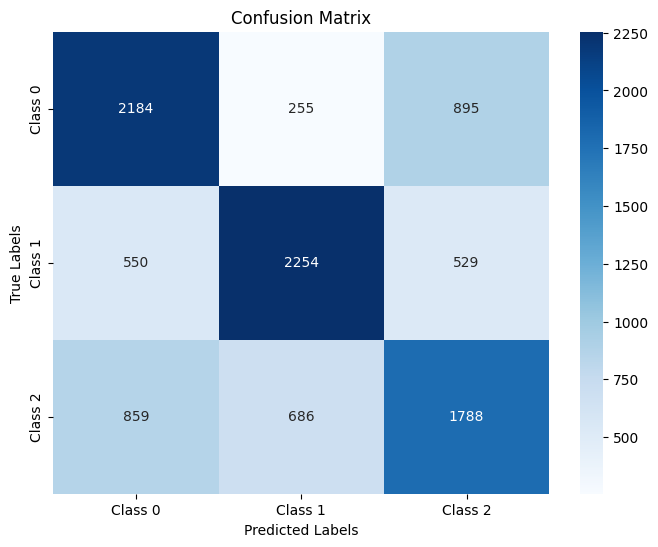

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the weights to a file
dl_model.save_weights('/content/drive/MyDrive/image_course/weights2.weights.h5')




In [ ]:
report = classification_report(y_true, y_pred_classes)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63      3334
           1       0.71      0.68      0.69      3333
           2       0.56      0.54      0.55      3333

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



In [ ]:
test_text = ['انا احب السبانخ',' ابغض الغباء  ']

test_text_pre = [preprocess_text(text) for text in test_text]
test_text_pre

['انا احب السبانخ', 'ابغض الغباء']

In [ ]:
for sentence in test_text_pre:
    input_vector = preprocess_text(sentence)
    input_vector = model.wv.get_mean_vector(input_vector)
    input_vector = np.expand_dims(input_vector, axis=0)

    predictions = dl_model.predict(input_vector)

    predicted_class = np.argmax(predictions, axis=1)

    print(f"Sentence: '{sentence}' | Predicted class: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Sentence: 'انا احب السبانخ' | Predicted class: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Sentence: 'ابغض الغباء' | Predicted class: 0
